In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  

In [26]:
df = pd.read_csv('after_merge.csv')
df.dtypes

Unnamed: 0                         int64
State Abbreviation                object
Accident Severity in State       float64
Number of Accidents in State       int64
State                             object
Customer                          object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel   

In [28]:
cat1 = df.select_dtypes(include='object')
cat2 = categorical_df.drop(['Customer','Effective To Date'], axis = 1)  #but Customer and Date are not categorical

In [30]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for c in cat2.columns:
    cat2[c] = lb.fit_transform(cat2[c])
cat2

,State Abbreviation,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,4,0,0,0,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,1,0,0,0,1,1,2,1,1,3,1,3,0,1
9130,1,1,1,1,1,1,0,1,0,0,2,0,1,0,1
9131,1,1,0,1,0,4,1,1,2,0,1,0,1,0,1
9132,1,1,0,1,1,1,1,1,1,1,4,2,1,0,0


In [31]:
import statsmodels.api as sm
from sklearn import preprocessing

In [34]:
conti = df.select_dtypes(include=['int64','float'])
conti.reset_index(drop = True, inplace=True)
def stan(data):
    new_data=(data-data.mean())/data.std()
    return new_data
conti=stan(conti)
conti

,Unnamed: 0,Accident Severity in State,Number of Accidents in State,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-1.731766,2.537182,-0.848079,-0.762836,0.612794,-0.703886,1.678007,-1.543202,-0.422226,-0.822603,-0.169630
1,-1.731387,-0.333633,-0.778488,-0.149237,-1.239549,0.022690,-0.208175,-0.217322,-0.422226,2.106045,2.400606
2,-1.731008,1.574369,-0.924665,0.710597,0.365690,0.429572,0.288189,-0.360661,-0.422226,-0.404225,0.455709
3,-1.730629,-0.669515,1.369881,-0.052260,-1.239549,0.371446,0.288189,0.606873,-0.422226,1.687666,0.329750
4,-1.730249,2.537182,-0.848079,-0.755534,0.203379,-0.587634,-0.307448,-0.145653,-0.422226,-0.822603,-1.018788
...,...,...,...,...,...,...,...,...,...,...,...
9129,1.730249,-0.669515,1.369881,2.241467,1.128497,-0.587634,0.288189,1.466904,-0.422226,-0.404225,-0.811890
9130,1.730629,-0.669515,1.369881,-0.714372,-0.528421,-0.413256,-0.108902,-0.719007,-0.422226,-0.822603,-0.188946
9131,1.731008,-0.669515,1.369881,0.023134,-1.239549,-0.238878,-0.605266,-0.396495,2.873088,-0.404225,1.227869
9132,1.731387,-0.669515,1.369881,-0.069932,-0.517328,0.080816,1.876553,-1.614872,-0.422226,0.014154,0.885064


In [36]:
preprocessing.scale(conti,axis=0, with_mean=True, with_std=True, copy=True)
cat2.reset_index(drop = True, inplace=True)
all_data_df = pd.concat([conti,cat2], axis = 1)
all_data_df

,Unnamed: 0,Accident Severity in State,Number of Accidents in State,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,-1.731766,2.537182,-0.848079,-0.762836,0.612794,-0.703886,1.678007,-1.543202,-0.422226,-0.822603,...,1,0,1,1,0,2,0,0,5,1
1,-1.731387,-0.333633,-0.778488,-0.149237,-1.239549,0.022690,-0.208175,-0.217322,-0.422226,2.106045,...,4,0,1,2,1,5,2,0,0,1
2,-1.731008,1.574369,-0.924665,0.710597,0.365690,0.429572,0.288189,-0.360661,-0.422226,-0.404225,...,1,0,1,1,1,5,0,0,5,1
3,-1.730629,-0.669515,1.369881,-0.052260,-1.239549,0.371446,0.288189,0.606873,-0.422226,1.687666,...,4,1,1,1,0,1,0,2,3,1
4,-1.730249,2.537182,-0.848079,-0.755534,0.203379,-0.587634,-0.307448,-0.145653,-0.422226,-0.822603,...,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.730249,-0.669515,1.369881,2.241467,1.128497,-0.587634,0.288189,1.466904,-0.422226,-0.404225,...,1,1,2,1,1,3,1,3,0,1
9130,1.730629,-0.669515,1.369881,-0.714372,-0.528421,-0.413256,-0.108902,-0.719007,-0.422226,-0.822603,...,1,0,1,0,0,2,0,1,0,1
9131,1.731008,-0.669515,1.369881,0.023134,-1.239549,-0.238878,-0.605266,-0.396495,2.873088,-0.404225,...,4,1,1,2,0,1,0,1,0,1
9132,1.731387,-0.669515,1.369881,-0.069932,-0.517328,0.080816,1.876553,-1.614872,-0.422226,0.014154,...,1,1,1,1,1,4,2,1,0,0


In [37]:
from sklearn import linear_model

In [38]:
model = sm.OLS(all_data_df['Customer Lifetime Value'],all_data_df.drop('Customer Lifetime Value',axis=1)).fit()
# model.summary()

coef_df = pd.DataFrame({"params": model.params,   
                        "std err": model.bse,     
                        "t": round(model.tvalues,3),       
                        "p-values": round(model.pvalues,3) 
                         })
coef_df['Absolute params']=abs(coef_df['params'])
coef_df[coef_df['p-values']<0.05].sort_values(by='Absolute params',ascending=False)

,params,std err,t,p-values,Absolute params
Monthly Premium Auto,0.415181,0.014579,28.478,0.000,0.415181
Response,-0.061923,0.027587,-2.245,0.025,0.061923
Renew Offer Type,-0.049736,0.009819,-5.065,0.000,0.049736
Number of Open Complaints,-0.032798,0.009589,-3.420,0.001,0.032798
Marital Status,-0.032374,0.015458,-2.094,0.036,0.032374
Number of Policies,0.022328,0.009624,2.320,0.020,0.022328
Education,0.014275,0.006819,2.093,0.036,0.014275


In [39]:
factors = coef_df[coef_df['p-values']<0.05].index
factors

Index(['Monthly Premium Auto', 'Number of Open Complaints',
       'Number of Policies', 'Response', 'Education', 'Marital Status',
       'Renew Offer Type'],
      dtype='object')

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [41]:
y,X = all_data_df['Customer Lifetime Value'],all_data_df[factors]
X

,Monthly Premium Auto,Number of Open Complaints,Number of Policies,Response,Education,Marital Status,Renew Offer Type
0,-0.703886,-0.422226,-0.822603,0,0,1,0
1,0.022690,-0.422226,2.106045,0,0,2,2
2,0.429572,-0.422226,-0.404225,0,0,1,0
3,0.371446,-0.422226,1.687666,0,0,1,0
4,-0.587634,-0.422226,-0.822603,0,0,2,0
...,...,...,...,...,...,...,...
9129,-0.587634,-0.422226,-0.404225,0,0,1,1
9130,-0.413256,-0.422226,-0.822603,1,1,0,0
9131,-0.238878,2.873088,-0.404225,0,0,2,0
9132,0.080816,-0.422226,0.014154,0,1,1,2


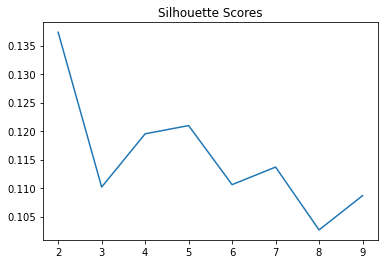

In [42]:
silhouette_scores = []
for k in range(2,10):
    estimator = KMeans(n_clusters=k)
    estimator.fit(all_data_df)
    label_pred = estimator.labels_ # Get the cluster labels
    silhouette_score_cluster = silhouette_score(all_data_df,label_pred)
    silhouette_scores.append(silhouette_score_cluster)

plt.title('Silhouette Scores')
plt.plot([i for i in range(2,10)],silhouette_scores)
plt.show()

<p>pick the number of cluster with the highest score, but maybe 5 is more reasonable</p>

In [43]:
k=5
estimator = KMeans(n_clusters=k)
estimator.fit(all_data_df)
label_pred = estimator.labels_ #Obtain the cluster labels
centroids = estimator.cluster_centers_ # Obtain the centroids
inertia = estimator.inertia_ 
all_data_df['KMeans Label'] = label_pred

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(all_data_df)  # Dimension reduction
# tsne.embedding_ can return the data after dimension reduction
print('tsne.embedding_: \n', tsne.embedding_)
tsn = pd.DataFrame(tsne.embedding_, index=X.index)  # Transform the data format
print('tsne: \n', tsne)

plt.rcParams['axes.unicode_minus'] = False  # To show negative signs

tsne.embedding_: 
 [[ 45.538506   51.181156 ]
 [-31.732674  -38.28641  ]
 [ 64.372284   33.15051  ]
 ...
 [-44.6656    -22.673798 ]
 [-69.42297     7.8346553]
 [ -8.472818  -57.5839   ]]
tsne: 
 TSNE()


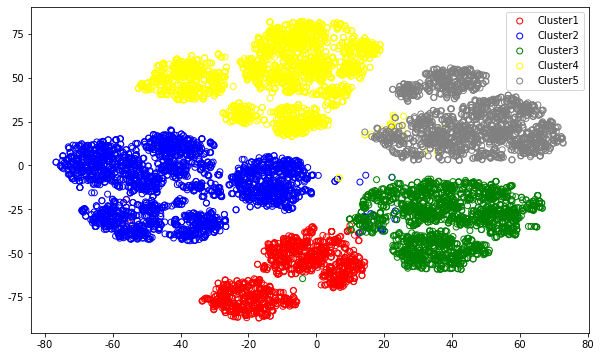

In [46]:
color_style = ['red', 'blue', 'green', 'yellow','grey']
plt.figure(figsize=(10,6))
for i in range(k):
    d = tsn[all_data_df[u'KMeans Label'] == i]
    plt.scatter(d[0], d[1],edgecolors=color_style[i],color=[], label='Cluster' + str(i+1))
plt.legend()
plt.show()

In [47]:
cont = df.select_dtypes(include=['int64','float'])
cont.reset_index(drop = True, inplace=True)
cat1 = df.select_dtypes(include='object')
cat2 = cat1.drop(['Customer','Effective To Date'], axis = 1)
all = pd.concat([cont,cat2], axis = 1)
all['Label'] = label_pred
all.to_csv('Labeled_3.csv')

In [48]:
all.groupby('Label').mean()

,Unnamed: 0,Accident Severity in State,Number of Accidents in State,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Label,,,,,,,,,,,
0,4728.281304,2.078594,363599.044597,8907.419949,1657.185249,113.148370,14.948542,49.524871,0.380789,3.013722,734.773912
1,4792.190191,2.051908,529956.385965,6552.542122,37696.972488,78.261563,15.067384,47.805423,0.402313,3.008373,352.550946
2,4884.239327,2.051592,538446.619363,9660.984452,51764.903187,106.914011,14.962718,46.860493,0.347565,2.952495,433.516792
3,4254.918367,2.149552,83762.298237,6801.843340,38221.794063,78.750000,15.288033,48.123377,0.401670,2.957792,358.000285
4,4193.984156,2.155535,81750.124314,9485.866918,48138.331505,107.051188,15.132846,48.566118,0.374162,2.892748,445.603810


Text(0.5, 1.0, 'Average Response Rate')

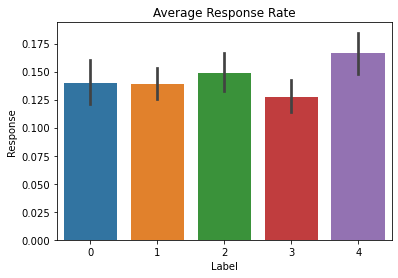

In [49]:
all['Response'] = all['Response'].apply(lambda x: 0 if x=='No' else 1)
sns.barplot(x='Label',y='Response',data=all,orient='v')
plt.title('Average Response Rate')